In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
from scipy import ndimage
from matplotlib.pyplot import imshow
import torch
from PIL import Image
import numpy as np
# from drive.MyDrive.duboko_projekt.networks import Generator, Discriminator
from networks import Generator, Discriminator

In [2]:
# SAVE_PATH = "/content/drive/MyDrive/duboko_projekt/dub2_data/subset_1000/"
SAVE_PATH = 'models/'
checkpoint_file = SAVE_PATH + "gen_x_ckpt_lambda10_final.pt"


gen_x = Generator(3, num_features=32)

checkpoint = torch.load(checkpoint_file, map_location=torch.device('cpu'))
gen_x.load_state_dict(checkpoint)

<All keys matched successfully>

In [3]:
import cv2
#!pip install mediapipe
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

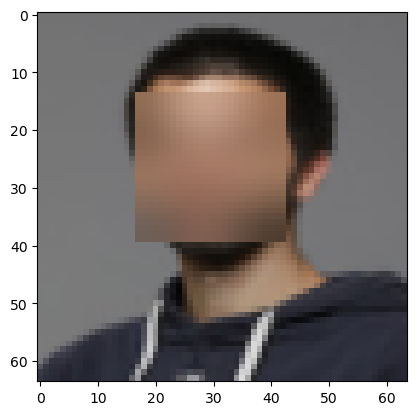

In [4]:
import torchvision
def prepare_image(img_path="lovro_mrcelja.jpg"):
    img = cv2.imread(img_path)
    trans = torchvision.transforms.Compose([torchvision.transforms.Resize((64, 64))])
    img = np.array(trans(Image.fromarray(img)))
    H, W, _ = img.shape

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    out = face_detection.process(img_rgb)

    if out.detections is not None:
        for detection in out.detections:
            location_data = detection.location_data
            bbox = location_data.relative_bounding_box

            x1, y1, w, h = bbox.xmin, bbox.ymin, bbox.width, bbox.height

            x1 = int(x1 * W)
            y1 = int(y1 * H)
            w = int(w * W)
            h = int(h * H)

            # print(x1, y1, w, h)

            img_rgb[y1:y1 + h, x1:x1 + w, :] = cv2.GaussianBlur(img_rgb[y1:y1 + h, x1:x1 + w, :], (25, 25), 0)

    z = torchvision.transforms.ToTensor()(img_rgb)
    imshow(z.permute(1,2,0))
    return z
z = prepare_image()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


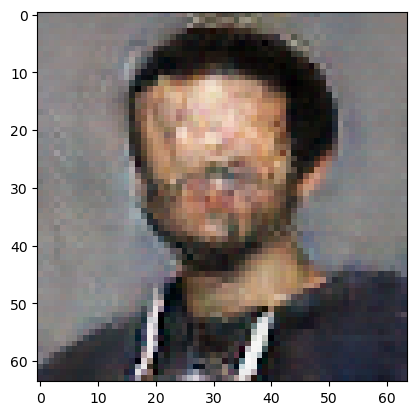

In [5]:
x = gen_x(z)
imshow(x.detach().permute(1,2,0))